In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import xgboost as xgb
from statsmodels.stats.anova import anova_lm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import classification_report
import os as os
import math

warnings.filterwarnings('ignore')

In [4]:
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available



In [5]:
# load data
path = '/Users/dylanjorling/UCLA/412proj/data/'
name = 'full_combine_data'
data = pd.read_csv(path + name, index_col=0)
data.head()


,year,name,college,pos,height,weight,hand_size,arm_length,forty,bench,vert,broad_jump,shuttle,3cone,pick
0,1987,Mike Adams,Arizona St.,DB,69.8,198,8.50,30.50,4.42,13.0,32.0,118.0,4.60,NaN,undrafted
1,1987,John Adickes,Baylor,OL,74.8,266,10.25,30.00,4.97,25.0,26.5,103.0,4.60,NaN,154
2,1987,Tommy Agee,Auburn,RB,71.8,217,9.00,30.75,NaN,15.0,NaN,NaN,NaN,NaN,119
3,1987,David Alexander,Tulsa,OL,75.0,279,10.50,32.75,5.13,22.0,27.5,105.0,4.33,NaN,121
4,1987,Lyneal Alston,Southern Miss,WR,72.1,202,10.00,33.00,4.64,7.0,32.0,114.0,4.52,NaN,undrafted


In [4]:
data.columns = [x.lower() for x in data.columns]
data.head()

,year,name,college,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,pick
0,1987,Mike Adams,Arizona St.,DB,69.8,198,8.50,30.50,4.42,13.0,32.0,118.0,4.60,NaN,undrafted
1,1987,John Adickes,Baylor,OL,74.8,266,10.25,30.00,4.97,25.0,26.5,103.0,4.60,NaN,154
2,1987,Tommy Agee,Auburn,RB,71.8,217,9.00,30.75,NaN,15.0,NaN,NaN,NaN,NaN,119
3,1987,David Alexander,Tulsa,OL,75.0,279,10.50,32.75,5.13,22.0,27.5,105.0,4.33,NaN,121
4,1987,Lyneal Alston,Southern Miss,WR,72.1,202,10.00,33.00,4.64,7.0,32.0,114.0,4.52,NaN,undrafted


In [7]:
data = data.dropna()
data["pick"][data["pick"] == "undrafted"] = 0
data["pick"] = pd.to_numeric(data["pick"])
data["pick"][data["pick"] > 0] = 1
#drafted = 1
#undrafted = 0
y = data['pick']
X = data.iloc[:, 4:-1]
#X = data.iloc[:, 3:-1]
#X = pd.get_dummies(X)
print(X)
y


       height (in)  weight (lbs)  hand size (in)  arm length (in)  40 yard  \
3350         76.40           244           10.00            32.50     5.01   
3351         74.60           239            9.00            32.75     4.92   
3355         75.50           274            9.50            35.63     5.03   
3357         70.60           190           10.25            32.00     4.80   
3360         70.00           203            9.50            32.00     4.66   
...            ...           ...             ...              ...      ...   
13495        76.88           308           10.25            33.88     4.96   
13496        71.50           194            9.00            31.13     4.40   
13502        78.50           249            9.75            33.00     4.76   
13507        78.13           315           10.50            33.88     5.27   
13542        78.13           316            9.88            32.88     5.13   

       bench press  vert leap (in)  broad jump (in)  shuttle  3

3350     1
3351     0
3355     1
3357     1
3360     1
        ..
13495    1
13496    0
13502    1
13507    1
13542    1
Name: pick, Length: 5843, dtype: int64

In [11]:
data.columns = ["year", "name", "college", "pos", "height", "weight", "hand_size", "arm_length", "forty", "bench_press", "vert", "broad_jump", "shuttle", "cone", "pick"]
X.columns = ["height", "weight", "hand_size", "arm_length", "forty", "bench_press", "vert", "broad_jump", "shuttle", "cone"]
X.corr()

[Text(0.5, 1.0, 'Boxplot of Height by Pick')]

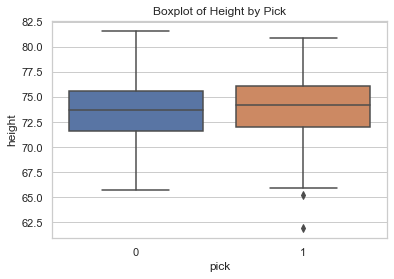

In [70]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='height', data=data).set(title = "Boxplot of Height by Pick")

[Text(0.5, 1.0, 'Boxplot of Weight by Pick')]

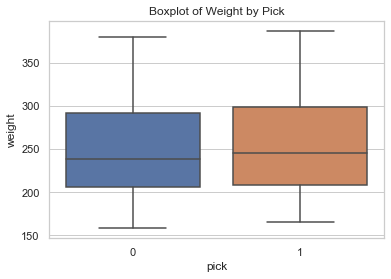

In [18]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='weight', data=data).set(title = "Boxplot of Weight by Pick")

[Text(0.5, 1.0, 'Boxplot of Hand Size by Pick')]

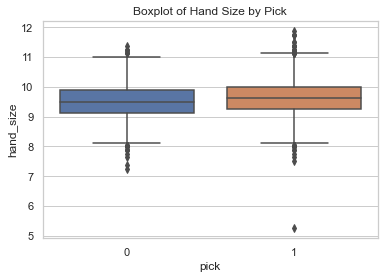

In [37]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='hand_size', data=data).set(title = "Boxplot of Hand Size by Pick")

[Text(0.5, 1.0, 'Boxplot of Arm Length by Pick')]

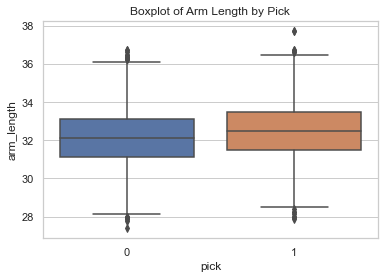

In [38]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='arm_length', data=data).set(title = "Boxplot of Arm Length by Pick")

[Text(0.5, 1.0, 'Boxplot of 40 Yard Dash by Pick')]

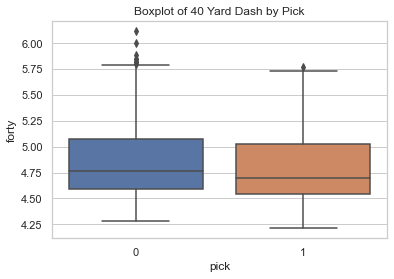

In [39]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='forty', data=data).set(title = "Boxplot of 40 Yard Dash by Pick")

[Text(0.5, 1.0, 'Boxplot of Bench Press by Pick')]

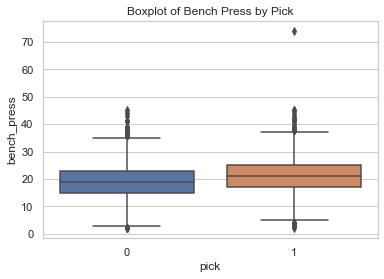

In [55]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='bench_press', data=data).set(title = "Boxplot of Bench Press by Pick")

[Text(0.5, 1.0, 'Boxplot of Vertical by Pick')]

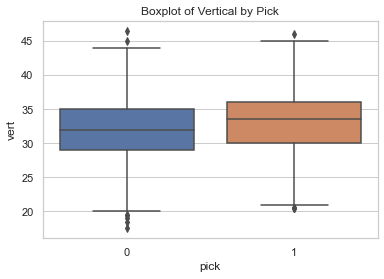

In [40]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='vert', data=data).set(title = "Boxplot of Vertical by Pick")

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='broad_jump', data=data).set(title = "Boxplot of Broad Jump by Pick")

[Text(0.5, 1.0, 'Boxplot of Shuttle by Pick')]

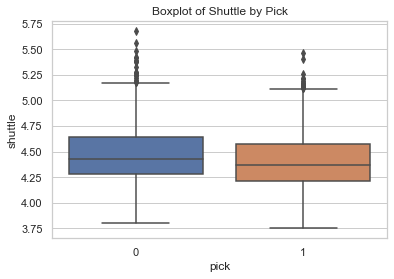

In [42]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='shuttle', data=data).set(title = "Boxplot of Shuttle by Pick")

[Text(0.5, 1.0, 'Boxplot of 3Cone by Pick')]

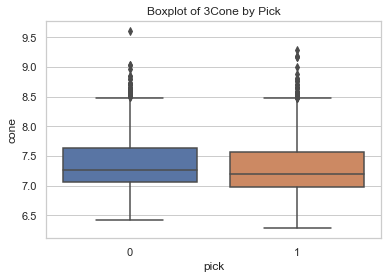

In [43]:
sns.set(style='whitegrid')
sns.boxplot(x='pick', y='cone', data=data).set(title = "Boxplot of 3Cone by Pick")

# Condense Logistic Model

In [205]:
new = X.loc[:, X.columns.isin(["forty", #56.8
                               "weight",#, 62.9 
                               "shuttle"#,65.9
                               #"cone"#,66.05
                              #"height", #65.9
                              #"arm_length"#, 66.05
                              #"vert"#, 65.7
                              #"bench_press"#,65.2
                              #"broad_jump"#, 65.0
                              #"hand_size" 64.3
                              ])]


new_train, new_test, y_train, y_test = train_test_split(new, y, test_size=0.3, random_state=42)



In [206]:
# Logistic Regression with CV
new_model_cv = LogisticRegressionCV(cv=10, random_state=42)
new_model_cv.fit(new_train, y_train)
new_model_cv.score(new_test, y_test)

0.6588705077010839

[[327 452]
 [146 828]]


[Text(0.5, 12.5, 'Predicted Class'), Text(30.5, 0.5, 'True Class')]

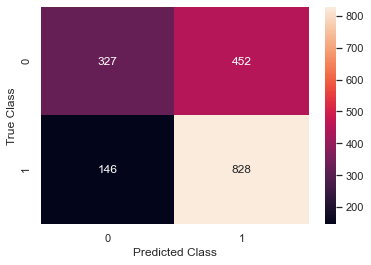

In [207]:
y_pred = new_model_cv.predict(new_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
conf = sns.heatmap(cf_matrix, annot=True, fmt=".0f")
conf.set(xlabel='Predicted Class', ylabel='True Class')

In [208]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52       779
           1       0.65      0.85      0.73       974

    accuracy                           0.66      1753
   macro avg       0.67      0.63      0.63      1753
weighted avg       0.67      0.66      0.64      1753



## Odds

In [162]:
odds = [math.exp(x) for x in new_model_cv.coef_[0]]
print(new_train.columns)
print(odds)

Index(['weight', 'forty', 'shuttle'], dtype='object')
[1.0374082566598295, 0.017438080181058697, 0.10777813172346859]


In [163]:
new_model.coef_[0]

array([ 0.03634102, -3.98757502, -2.24177384])

In [164]:
new_train.columns

Index(['weight', 'forty', 'shuttle'], dtype='object')

From our reduced model we get coefficients of 0.0363 for weight, -3.9875 for forty yard dash, and -2.2418 in shuttle. After converting these coefficients to odds we get that for every 1 pound increase in weight, the odds of being drafted to the NFL increase by 3.74%, for every 1 unit increase in Forty Yard Dash Time the odds of being drafted to the NFL decrease by 97.1%, and for every 1 unit increase in Shuttle Time the odds of being drafted to the NFL decrease by 89.6% 

# Full Logistic

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
# Logistic Regression with CV
model_cv = LogisticRegressionCV(cv=10, random_state=42)
model_cv.fit(X_train, y_train)
print(model_cv.score(X_test, y_test))
y_pred = model_cv.predict(X_test)


0.6428978893325727


[[336 443]
 [183 791]]
              precision    recall  f1-score   support

           0       0.65      0.43      0.52       779
           1       0.64      0.81      0.72       974

    accuracy                           0.64      1753
   macro avg       0.64      0.62      0.62      1753
weighted avg       0.64      0.64      0.63      1753



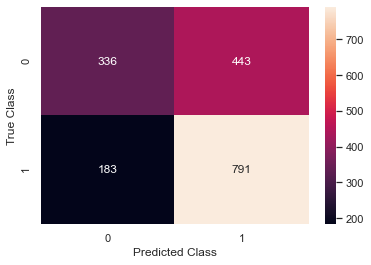

In [201]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
conf = sns.heatmap(cf_matrix, annot=True, fmt=".0f")
conf.set(xlabel='Predicted Class', ylabel='True Class')

print(classification_report(y_test, y_pred))

In [204]:
791/(791+443) #of the predicted positive values it only identifies 64% correctly
791/(791+183) # of the drafted players it identifies 81% of them

0.6410048622366289

## RF

In [209]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [210]:
y_pred = rf.predict(X_test)

In [211]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6423274386765545


In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.46      0.53       779
           1       0.65      0.79      0.71       974

    accuracy                           0.64      1753
   macro avg       0.64      0.62      0.62      1753
weighted avg       0.64      0.64      0.63      1753



[[360 419]
 [208 766]]


[Text(0.5, 12.5, 'Predicted Class'), Text(30.5, 0.5, 'True Class')]

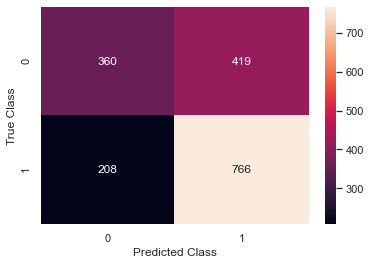

In [213]:
cf_matrix1 = confusion_matrix(y_test, y_pred)
print(cf_matrix1)
import seaborn as sns
conf1 = sns.heatmap(cf_matrix1, annot=True, fmt=".0f")
conf1.set(xlabel='Predicted Class', ylabel='True Class')

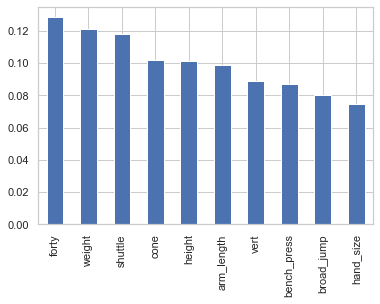

In [182]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [214]:
fws = X[["forty", "weight", "shuttle"]]
new_train2, new_test2, y_train2, y_test2 = train_test_split(fws, y, test_size=0.3, random_state=42)

In [215]:
rf2 = RandomForestClassifier()
rf2.fit(new_train2, y_train2)
y_pred2 = rf2.predict(new_test2)
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.6383342840844267


In [216]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55       779
           1       0.65      0.76      0.70       974

    accuracy                           0.64      1753
   macro avg       0.63      0.62      0.62      1753
weighted avg       0.64      0.64      0.63      1753



[[382 397]
 [237 737]]


[Text(0.5, 12.5, 'Predicted Class'), Text(30.5, 0.5, 'True Class')]

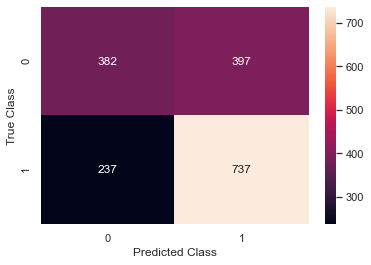

In [217]:
cf_matrix2 = confusion_matrix(y_test2, y_pred2)
print(cf_matrix2)
import seaborn as sns
conf2 = sns.heatmap(cf_matrix2, annot=True, fmt=".0f")
conf2.set(xlabel='Predicted Class', ylabel='True Class')